In [171]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
from patsy import dmatrices
from sklearn import metrics
import matplotlib.pyplot as plt
from scipy import stats

In [172]:
df = pd.read_csv("Auto.csv")
df['origin'] = df['origin'].astype('category')
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
print(df.dtypes)
df.head(5)

mpg              float64
cylinders          int64
displacement     float64
horsepower       float64
weight             int64
acceleration     float64
year               int64
origin          category
name              object
dtype: object


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [173]:
def linearRegression(df, model_formula, seed=1, print_mse=False):
    np.random.seed(seed)
    mask = np.random.rand(len(df)) < 0.8
    train_set = df[mask]
    test_set = df[~mask]

    train_y, train_x = dmatrices(model_formula, data=train_set, return_type="dataframe")
    valid_y, valid_x = dmatrices(model_formula, data=test_set, return_type="dataframe")

    model = sm.OLS(train_y, train_x)
    result = model.fit()

    train_y_pred = result.predict(train_x)
    valid_y_pred = result.predict(valid_x)
    train_mse = metrics.mean_squared_error(train_y, train_y_pred)
    valid_mse = metrics.mean_squared_error(valid_y, valid_y_pred)
    
    if print_mse == True:
        print(f"MSE_Train: {train_mse}")
        print(f"MSE_Test: {valid_mse}\n")

    return result, {"train": train_mse, "valid": valid_mse}

In [174]:
result,_ = linearRegression(df, "mpg ~ horsepower", True)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     465.5
Date:                Fri, 24 Nov 2023   Prob (F-statistic):           2.11e-63
Time:                        14:25:16   Log-Likelihood:                -932.73
No. Observations:                 308   AIC:                             1869.
Df Residuals:                     306   BIC:                             1877.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     40.5555      0.821     49.392      0.000      38.940      42.171
horsepower    -0.1602      0.007    -21.574      0.000      -0.175      -0.146
==============================================================================
Omnibus:                       11.228   Durbin-Watson:                   0.962
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.400
Skew:                           0.449   Prob(JB):                      0.00335
Kurtosis:                       3.284   Cond. No.                         318.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

                   mpg  cylinders  displacement  horsepower    weight  acceleration      year
mpg           1.000000  -0.776260     -0.804443   -0.778427 -0.831739      0.422297  0.581469
cylinders    -0.776260   1.000000      0.950920    0.842983  0.897017     -0.504061 -0.346717
displacement -0.804443   0.950920      1.000000    0.897257  0.933104     -0.544162 -0.369804
horsepower   -0.778427   0.842983      0.897257    1.000000  0.864538     -0.689196 -0.416361
weight       -0.831739   0.897017      0.933104    0.864538  1.000000     -0.419502 -0.307900
acceleration  0.422297  -0.504061     -0.544162   -0.689196 -0.419502      1.000000  0.282901
year          0.581469  -0.346717     -0.369804   -0.416361 -0.307900      0.282901  1.000000


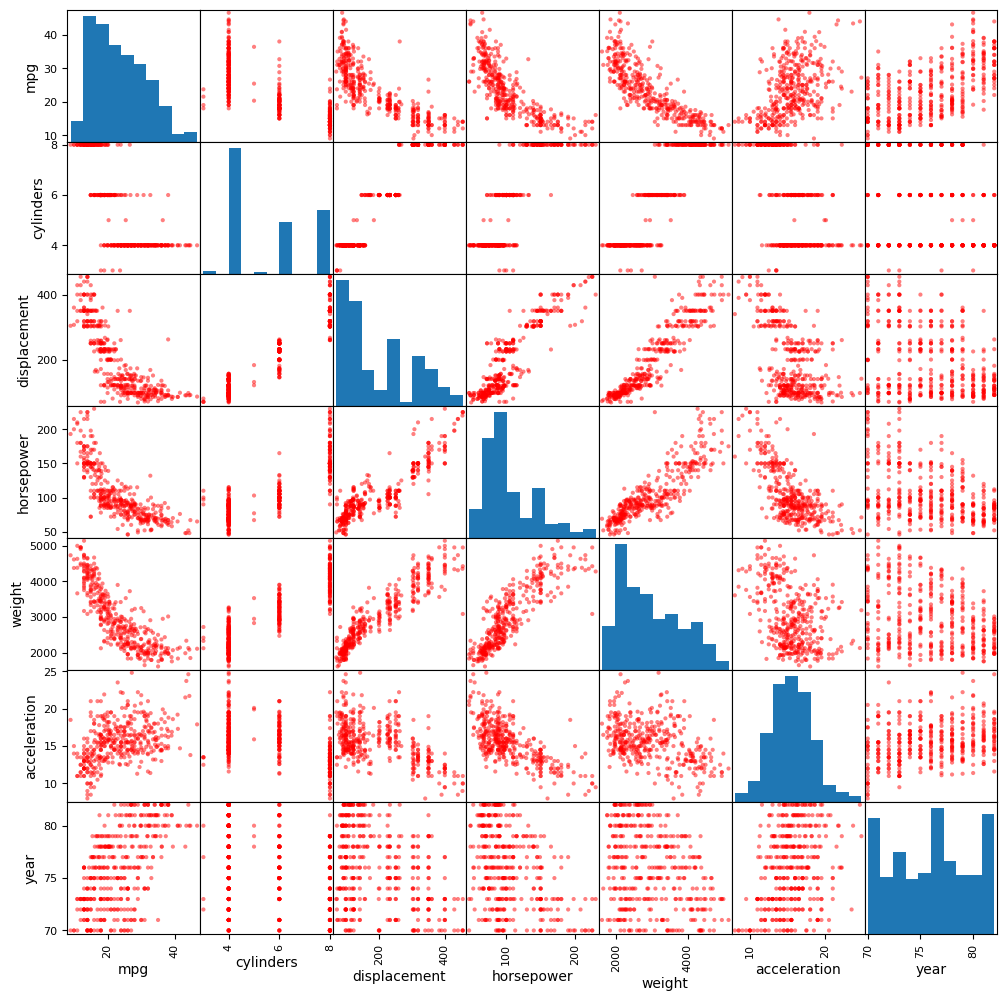

In [175]:
pd.set_option('display.width', 1000)
print(df.corr())
axis = pd.plotting.scatter_matrix(df,color="red",figsize=(12,12))

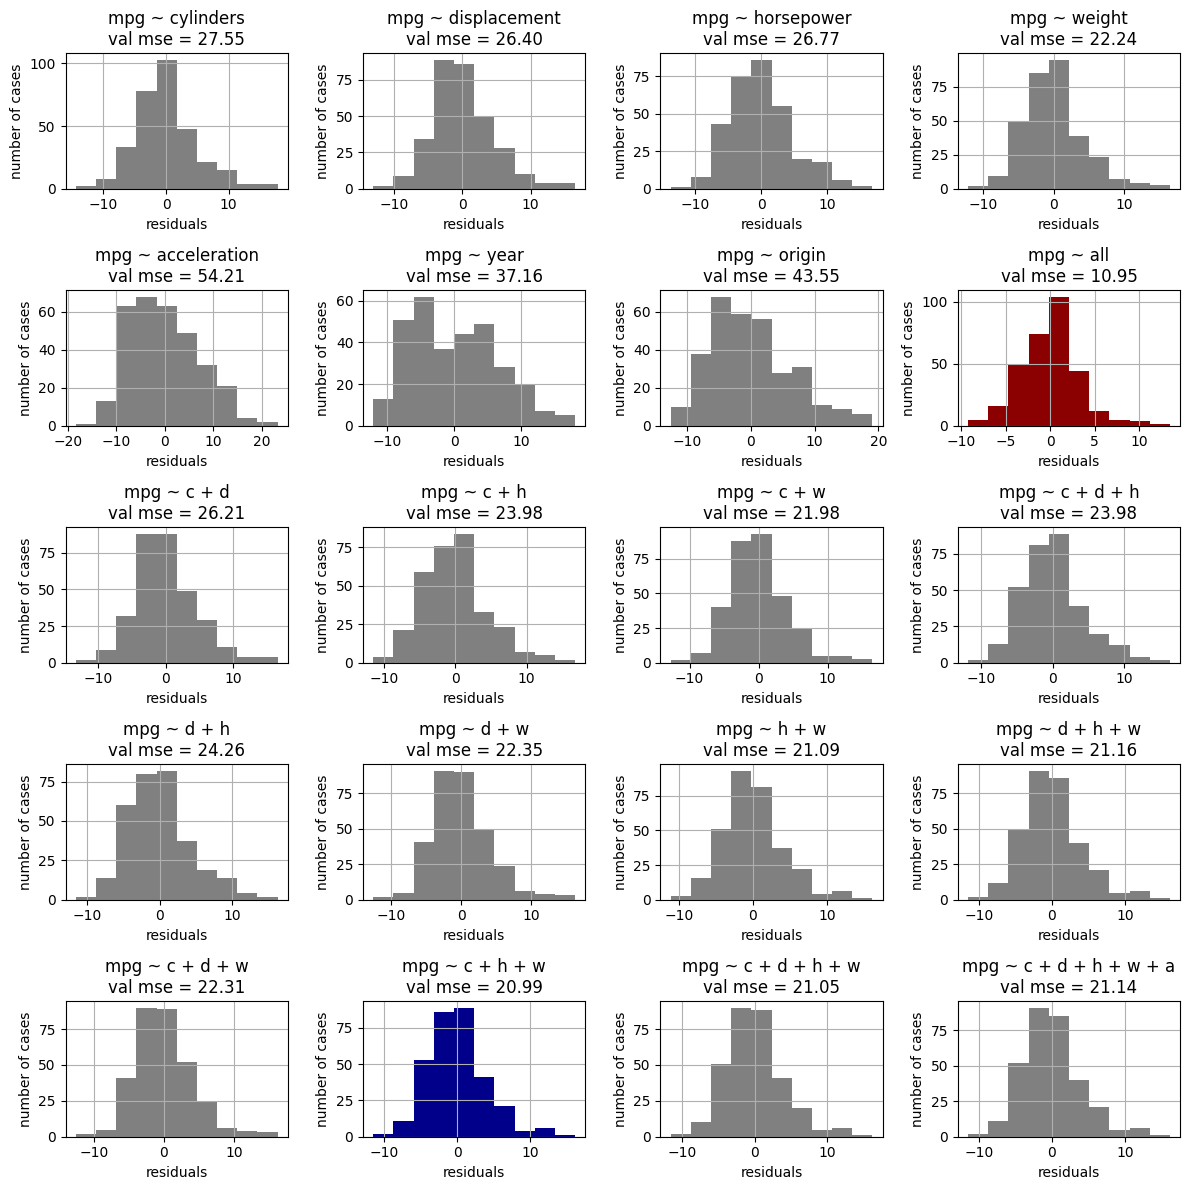

In [176]:
models = [
    "mpg ~ cylinders",
    "mpg ~ displacement",
    "mpg ~ horsepower",
    "mpg ~ weight",
    "mpg ~ acceleration",
    "mpg ~ year",
    "mpg ~ origin",
    
    "mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin",
    
    "mpg ~ cylinders + displacement",
    "mpg ~ cylinders + horsepower ",
    "mpg ~ cylinders + weight",
    "mpg ~ cylinders + displacement + horsepower",
    
    "mpg ~ displacement + horsepower",
    "mpg ~ displacement + weight",
    "mpg ~ horsepower + weight",
    "mpg ~ displacement + horsepower + weight",
    
    "mpg ~ cylinders + displacement + weight",
    "mpg ~ cylinders + horsepower + weight",
    "mpg ~ cylinders + displacement + horsepower + weight",
    "mpg ~ cylinders + displacement + horsepower + weight + acceleration"
]

model_name = [model for model in models]
model_name[7] = "mpg ~ all"
model_name[8] = "mpg ~ c + d"
model_name[9] = "mpg ~ c + h"
model_name[10] = "mpg ~ c + w"
model_name[11] = "mpg ~ c + d + h"
model_name[12] = "mpg ~ d + h"
model_name[13] = "mpg ~ d + w"
model_name[14] = "mpg ~ h + w"
model_name[15] = "mpg ~ d + h + w"
model_name[16] = "mpg ~ c + d + w"
model_name[17] = "mpg ~ c + h + w"
model_name[18] = "mpg ~ c + d + h + w"
model_name[19] = "mpg ~ c + d + h + w + a"

seed = np.random.randint(2**32)

fig = plt.figure(figsize=(12, 12))
i = 1
for model in models:
    fig.add_subplot(5, 4, i)
    result, mse = linearRegression(df, model, seed)
    color = "gray" if mse["valid"] > 21 else "darkblue"
    ax = result.resid.hist(color=color if mse["valid"] > 15 else "darkred")
    ax.set_xlabel("residuals")
    ax.set_ylabel("number of cases")
    ax.set_title(f"{model_name[i-1]}\nval mse = {mse['valid']:.2f}")
    plt.tight_layout()
    i = i + 1

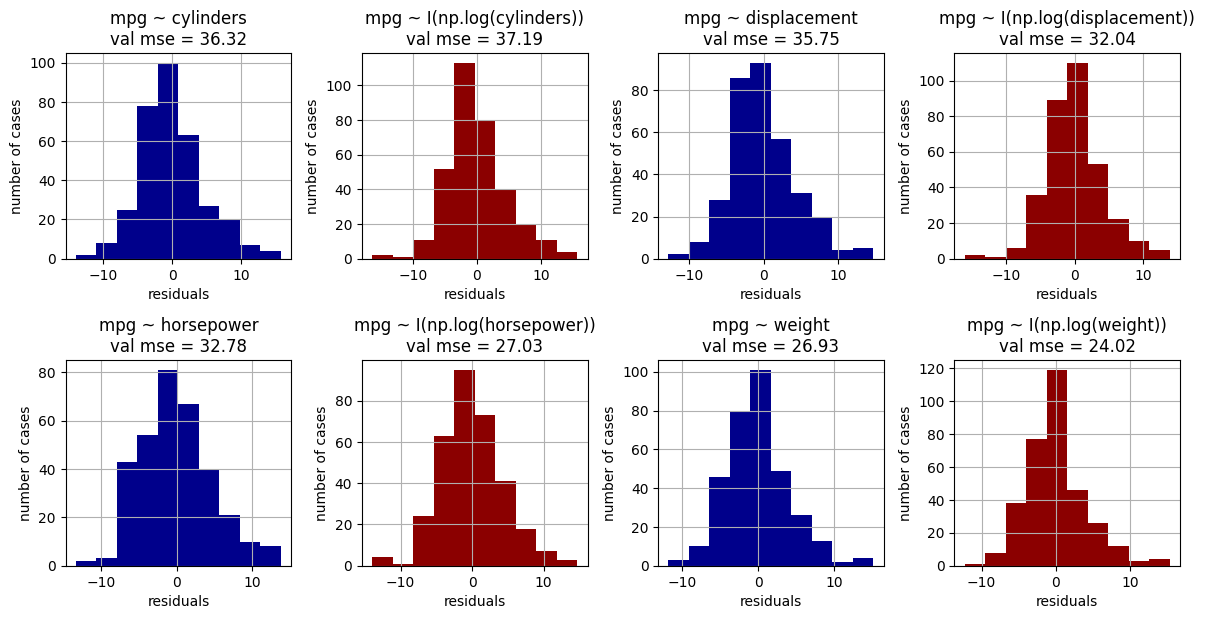

In [177]:
models = [
    "mpg ~ cylinders",
    "mpg ~ I(np.log(cylinders))",
    "mpg ~ displacement",
    "mpg ~ I(np.log(displacement))",
    "mpg ~ horsepower",
    "mpg ~ I(np.log(horsepower))",
    "mpg ~ weight",
    "mpg ~ I(np.log(weight))",
]

seed = np.random.randint(2**32)

fig = plt.figure(figsize=(12, 12))
i = 1
for model in models:
    fig.add_subplot(4, 4, i)
    result, mse = linearRegression(df, model, seed)
    ax = result.resid.hist(color="darkblue" if i%2==1 else "darkred")
    ax.set_xlabel("residuals")
    ax.set_ylabel("number of cases")
    ax.set_title(f"{models[i-1]}\nval mse = {mse['valid']:.2f}")
    plt.tight_layout()
    i = i + 1

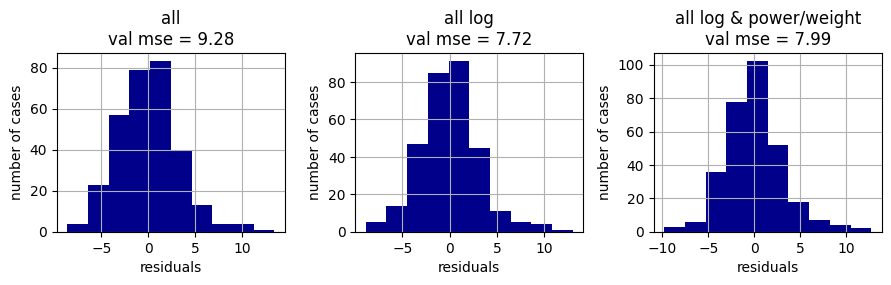

In [178]:
models = [
    "mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin",
    "mpg ~ I(np.log(cylinders)) + I(np.log(displacement)) + I(np.log(horsepower)) + \
        I(np.log(weight)) + I(np.log(acceleration)) + I(np.log(year)) + origin",
    "mpg ~ I(np.log(cylinders)) + I(np.log(displacement)) + I(np.log(horsepower)):I(np.log(weight)) +\
        I(np.log(acceleration)) + I(np.log(year)) + origin",
    
]

model_name = ["all", "all log", "all log & power/weight",]

seed = np.random.randint(2**32)

fig = plt.figure(figsize=(12, 12))
i = 1
for model in models:
    fig.add_subplot(5, 4, i)
    result, mse = linearRegression(df, model, seed)
    ax = result.resid.hist(color="darkblue")
    ax.set_xlabel("residuals")
    ax.set_ylabel("number of cases")
    ax.set_title(f"{model_name[i-1]}\nval mse = {mse['valid']:.2f}")
    plt.tight_layout()
    i = i + 1